# Canberra Real Estate Sales 2007-2019

## Introduction

Data was obtained from HtAG®. HtAG® or Higher than Average Growth is an analytics portal that assists real estate professionals, investors and home buyers in making property-related decisions with the help of timely and actionable real estate market data. HtAG® leverages the benefits of machine learning to rank the growth potential of over 420 Local Government Areas and 6,200 suburbs, Australia wide.

> #### Column Descriptions
- datesold = date when the property was sold
- price = price of the property when it was sold
- suburb = suburbs in Canberra, Australia
- postcode = postal code of a place
- lat = latitude of the location
- lon = longitude of the location
- parking = number of parking lots
- bathrooms = number of bathrooms
- bedrooms = number of bedrooms
- propertyType = type of the property
- suburbid = the id of the suburbs

> #### Background Stories

The world was experiencing a global financial crisis around 2007 to 2008 due to excessive risk-taking by banks combined with the bursting of the United States housing bubble caused the values of securities tied to U.S. real estate to plummet, damaging financial institutions globally and culminating an international banking crisis. The crisis sparked the Great Recession, which at the time was the most severe global recession since the "Great Depression". Canberra as the capital city of Australia was no exception to this crisis.

Through this project, we hope to understand how the real estate market in Canberra responded to the global financial crisis and what is the aftermath pricing trend. We are also hoping to gain any valuable insight into the Canberra real estate market.

> #### Questions
- What features affect the real estate prices in Canberra?
- What is the real estate price in Canberra going to be like in the near future according to the given datasets?

> #### The Scope of the Research Problem
- Historical data from 2007 - 2019
- Maximum real estate price capped at 5M (for analysis and visualization)

> #### Users
- Users & renters
- Property investors
- Renovators

## Data Cleaning and Visualization

> #### Import Modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import pingouin as pg

import warnings
warnings.filterwarnings('ignore')

sns.set()

> #### Import the Raw Dataset

In [2]:
raw_df = pd.read_csv('property_sales_canberra.csv')

In [3]:
raw_df.head()

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
0,9/06/2000,223000.0,Nicholls,2913,NaN,NaN,2,2.0,4,house,ACT708
1,1/01/2001,350000.0,Ngunnawal,2913,NaN,NaN,1,NaN,3,house,ACT706
2,11/12/2003,550000.0,Weston,2611,NaN,NaN,2,NaN,4,house,ACT441
3,21/09/2005,276000.0,Isabella Plains,2905,NaN,NaN,1,1.0,3,house,ACT612
4,1/11/2005,400000.0,Conder,2906,NaN,NaN,2,NaN,5,house,ACT613


## Preprocessing

> #### Descriptive Statistics of the Variables

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43178 entries, 0 to 43177
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datesold      43178 non-null  object 
 1   price         42435 non-null  float64
 2   suburb        43178 non-null  object 
 3   postcode      43178 non-null  int64  
 4   lat           42033 non-null  float64
 5   lon           42033 non-null  float64
 6   parking       43178 non-null  int64  
 7   bathrooms     42499 non-null  float64
 8   bedrooms      43178 non-null  int64  
 9   propertyType  43178 non-null  object 
 10  suburbid      43178 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 3.6+ MB


In [5]:
raw_df.describe(include='all')

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
count,43178,4.243500e+04,43178,43178.000000,42033.000000,42033.000000,43178.000000,42499.000000,43178.000000,43178,43178
unique,3851,NaN,107,NaN,NaN,NaN,NaN,NaN,NaN,2,107
top,28/10/2017,NaN,Kambah,NaN,NaN,NaN,NaN,NaN,NaN,house,ACT601
freq,56,NaN,1404,NaN,NaN,NaN,NaN,NaN,NaN,36236,1404
mean,NaN,6.037398e+05,NaN,2728.855644,-35.293447,149.096122,1.760017,1.643403,3.193501,NaN,NaN
std,NaN,3.139764e+05,NaN,146.564444,0.091796,0.040526,0.937361,0.644463,0.990638,NaN,NaN
min,NaN,5.000000e+04,NaN,2092.000000,-35.509975,148.921424,0.000000,1.000000,0.000000,NaN,NaN
25%,NaN,4.300000e+05,NaN,2607.000000,-35.363857,149.067390,1.000000,1.000000,3.000000,NaN,NaN
50%,NaN,5.390000e+05,NaN,2615.000000,-35.270536,149.099522,2.000000,2.000000,3.000000,NaN,NaN
75%,NaN,6.760000e+05,NaN,2905.000000,-35.212323,149.130708,2.000000,2.000000,4.000000,NaN,NaN


In [6]:
# Checking raw datasets

desc = []
for i in raw_df.columns:
    desc.append([i,
                     raw_df[i].dtypes,
                     raw_df[i].isna().sum(),
                     round((raw_df[i].isna().sum())/len(raw_df)*100,2),
                     raw_df[i].nunique(),
                     raw_df[i].drop_duplicates().sample(2).values])
pd.DataFrame(desc, columns = ['dataFeatures', 'dataType',' null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,datesold,object,0,0.00,3851,"[21/06/2010, 31/05/2011]"
1,price,float64,743,1.72,2701,"[292500.0, 1605000.0]"
2,suburb,object,0,0.00,107,"[Hall, Oaks Estate]"
3,postcode,int64,0,0.00,32,"[2614, 2602]"
4,lat,float64,1145,2.65,29673,"[-35.282129, -35.469296]"
5,lon,float64,1145,2.65,28505,"[149.106368, 149.155996]"
6,parking,int64,0,0.00,18,"[8, 12]"
7,bathrooms,float64,679,1.57,9,"[1.0, 3.0]"
8,bedrooms,int64,0,0.00,13,"[1, 4]"
9,propertyType,object,0,0.00,2,"[unit, house]"


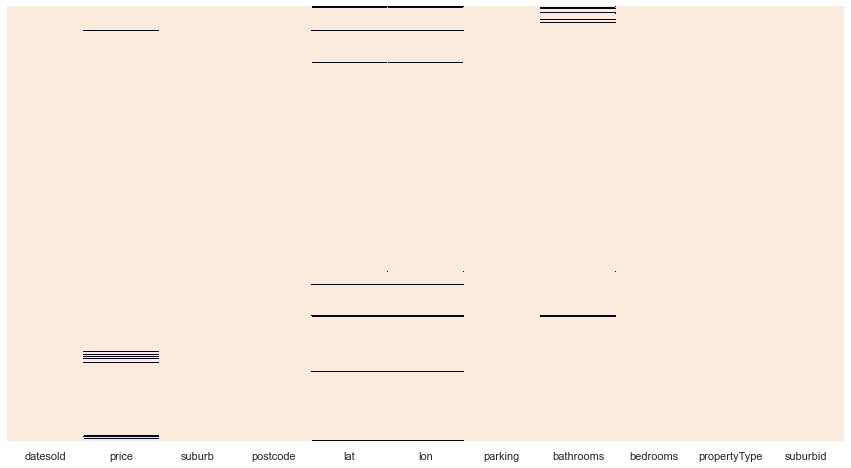

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(raw_df.isnull(), yticklabels=False, cbar=False, cmap='rocket_r')
plt.show()

In [8]:
raw_df.isna().sum()

datesold           0
price            743
suburb             0
postcode           0
lat             1145
lon             1145
parking            0
bathrooms        679
bedrooms           0
propertyType       0
suburbid           0
dtype: int64

In [9]:
df = raw_df.copy()

- __Determining Numerical and Categorical Features:__

In [10]:
len(df.columns)  # checking

11

In [11]:
categorical_columns = list(df.describe(exclude='number').columns)
numerical_columns = list(df.describe().columns)

In [12]:
numerical_columns.remove('postcode')
categorical_columns.append('postcode')

In [13]:
categorical_columns, len(categorical_columns)

(['datesold', 'suburb', 'propertyType', 'suburbid', 'postcode'], 5)

In [14]:
numerical_columns, len(numerical_columns)

(['price', 'lat', 'lon', 'parking', 'bathrooms', 'bedrooms'], 6)

- __Checking the Distribution of the Datasets Numerical Features Through Bar Plots:__

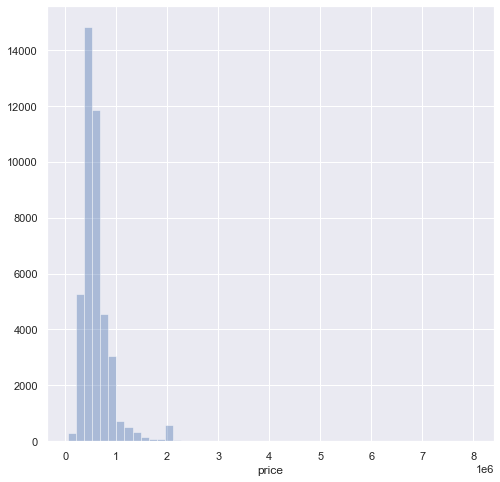

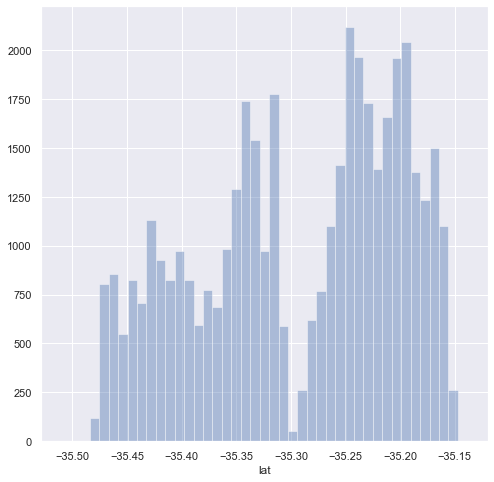

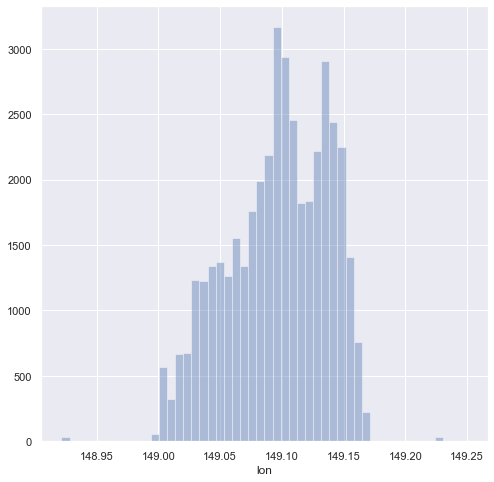

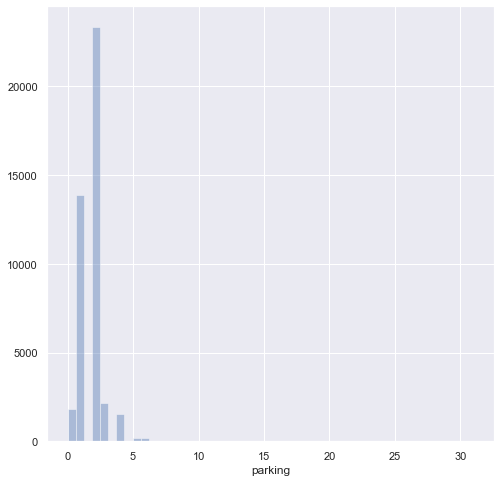

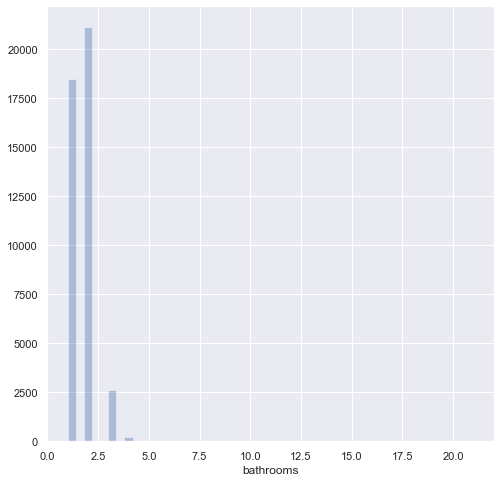

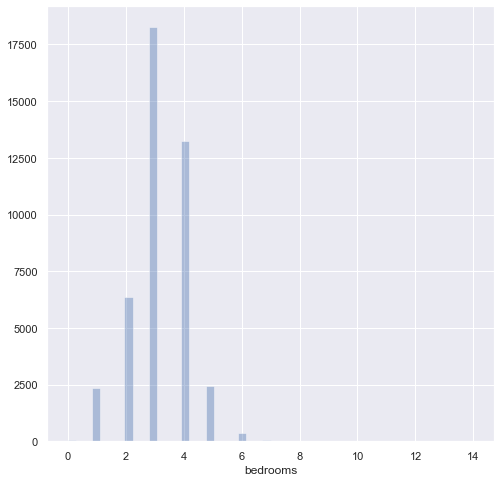

In [15]:
for i in numerical_columns:
    plt.figure(figsize = (8,8))
    sns.distplot(df[i], kde=False)

- __Using Scatter Plot to See the Relationship Between 'price' Column and Other Numerical Columns:__

In [16]:
numerical_columns_noprice = numerical_columns.copy()

In [17]:
numerical_columns_noprice.remove('price')

In [18]:
numerical_columns_noprice

['lat', 'lon', 'parking', 'bathrooms', 'bedrooms']

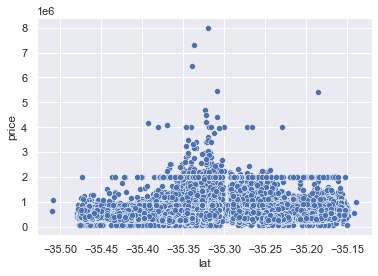

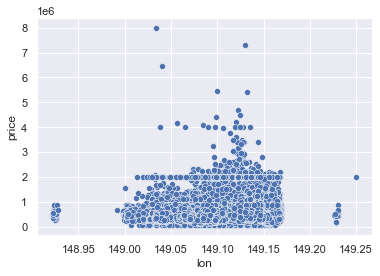

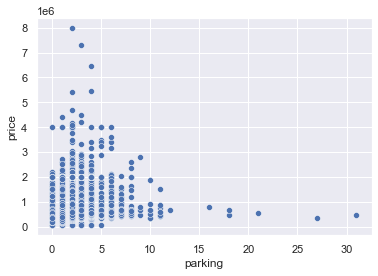

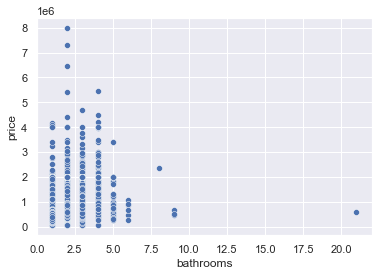

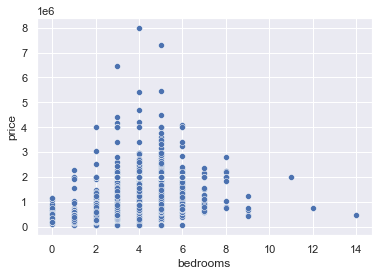

In [19]:
for i in numerical_columns_noprice:
    sns.scatterplot(df[i], df['price'])
    plt.show()

- __Checking Numerical Features Through Describe Method:__

In [20]:
df[numerical_columns].describe()

,price,lat,lon,parking,bathrooms,bedrooms
count,4.243500e+04,42033.000000,42033.000000,43178.000000,42499.000000,43178.000000
mean,6.037398e+05,-35.293447,149.096122,1.760017,1.643403,3.193501
std,3.139764e+05,0.091796,0.040526,0.937361,0.644463,0.990638
min,5.000000e+04,-35.509975,148.921424,0.000000,1.000000,0.000000
25%,4.300000e+05,-35.363857,149.067390,1.000000,1.000000,3.000000
50%,5.390000e+05,-35.270536,149.099522,2.000000,2.000000,3.000000
75%,6.760000e+05,-35.212323,149.130708,2.000000,2.000000,4.000000
max,8.000000e+06,-35.138572,149.250290,31.000000,21.000000,14.000000


- __Checking Categorical Features Through Describe Method:__

In [21]:
df[categorical_columns].describe(include='all')

,datesold,suburb,propertyType,suburbid,postcode
count,43178,43178,43178,43178,43178.000000
unique,3851,107,2,107,NaN
top,28/10/2017,Kambah,house,ACT601,NaN
freq,56,1404,36236,1404,NaN
mean,NaN,NaN,NaN,NaN,2728.855644
std,NaN,NaN,NaN,NaN,146.564444
min,NaN,NaN,NaN,NaN,2092.000000
25%,NaN,NaN,NaN,NaN,2607.000000
50%,NaN,NaN,NaN,NaN,2615.000000
75%,NaN,NaN,NaN,NaN,2905.000000


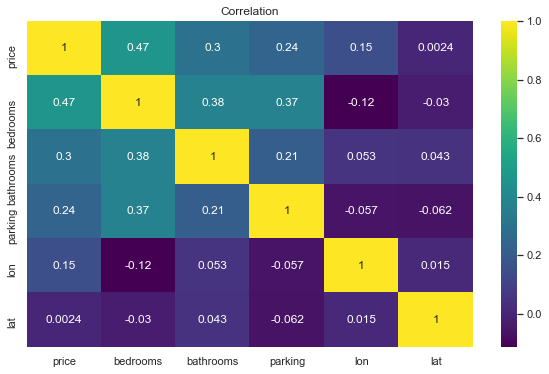

In [22]:
# Correlation Inspection

target = 'price'
k = 7 # number of variables for heatmap
cols = df[numerical_columns].corr().nlargest(k, target)[target].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.title('Correlation')
plt.show()

Through this heatmap it can be seen that 'lat', and 'lon' columns have relatively small correlation with the 'price' column, while 'bedrooms' has the highest.

> #### Removing Features

- __Both 'lat' and 'lon' columns, that display latitude and longitude of a place respectively, are going to be dropped in this visualization notebook, since there are other columns such as 'suburb' and 'postcode' that conveys the location of the unit/ house__

In [23]:
# Removing 'lat' and 'lon'
df.drop(['lat', 'lon'], axis=1, inplace=True)

In [24]:
df.head(3)

,datesold,price,suburb,postcode,parking,bathrooms,bedrooms,propertyType,suburbid
0,9/06/2000,223000.0,Nicholls,2913,2,2.0,4,house,ACT708
1,1/01/2001,350000.0,Ngunnawal,2913,1,NaN,3,house,ACT706
2,11/12/2003,550000.0,Weston,2611,2,NaN,4,house,ACT441


- __Column named 'suburbid' is going to be removed since it is literally just conveying the id of the suburbs from 'suburb' column__

In [25]:
df['suburb'].nunique(), df['suburbid'].nunique()

(107, 107)

In [26]:
df.drop('suburbid', axis=1, inplace=True)

In [27]:
df.head(3)

,datesold,price,suburb,postcode,parking,bathrooms,bedrooms,propertyType
0,9/06/2000,223000.0,Nicholls,2913,2,2.0,4,house
1,1/01/2001,350000.0,Ngunnawal,2913,1,NaN,3,house
2,11/12/2003,550000.0,Weston,2611,2,NaN,4,house


> #### Changing Data Type 

- __Converting 'datesold' Column Data Type to Date Type:__

In [28]:
df['datesold'] = pd.to_datetime(df['datesold'])
type(df['datesold'][0])  # checking

pandas._libs.tslibs.timestamps.Timestamp

> #### Dealing with Missing Values

In [29]:
df.isna().sum()

datesold          0
price           743
suburb            0
postcode          0
parking           0
bathrooms       679
bedrooms          0
propertyType      0
dtype: int64

- __Missing values in the 'price' column are going to be removed as this analysis is depended on the historical data of this feature__

In [30]:
# Percentage of missing values in 'price' column compare to all entries

df['price_null'] = np.where(df['price'].isnull(), 1, 0)
print(f"Missing values ratio: {round(df['price_null'].mean()* 100, 3) }%")

Missing values ratio: 1.721%


In [31]:
# Removing missing values in 'price' column

df.drop(['price_null'], axis=1, inplace=True)
df = df.dropna(subset=['price'])

In [32]:
print(f"Null values in 'price' column: {df['price'].isna().sum()}")  # checking

Null values in 'price' column: 0


In [33]:
df.isna().sum()  # Checking the remaining missing values

datesold          0
price             0
suburb            0
postcode          0
parking           0
bathrooms       658
bedrooms          0
propertyType      0
dtype: int64

- __Dealing with 'bathrooms' Column Missing Values:__

In [34]:
# Percentage of missing values in 'bathrooms' column compare to all entries

df['bathrooms_null'] = np.where(df['bathrooms'].isnull(), 1, 0)
print(f"Missing values ratio: {df['bathrooms_null'].mean()}")

Missing values ratio: 0.015506068104159302


In [35]:
# Checking 'bathrooms' column before preprocessing technique

df.drop(['bathrooms_null'], axis=1, inplace=True)
min_b = df['bathrooms'].min()
max_b = df['bathrooms'].max()
mean_b = df['bathrooms'].mean()
median_b = df['bathrooms'].median()
std_b = df['bathrooms'].std()

print("Statistics for 'bathrooms' column before dropping missing values:\n")
print("Minimum 'bathrooms': ", min_b) 
print("Maximum 'bathrooms': ", max_b)
print("Mean 'bathrooms': ", mean_b)
print("Median 'bathrooms': ", median_b)
print("Standard deviation of 'bathrooms': ", std_b)

Statistics for 'bathrooms' column before dropping missing values:

Minimum 'bathrooms':  1.0
Maximum 'bathrooms':  21.0
Mean 'bathrooms':  1.6413337482346746
Median 'bathrooms':  2.0
Standard deviation of 'bathrooms':  0.6437348103230224


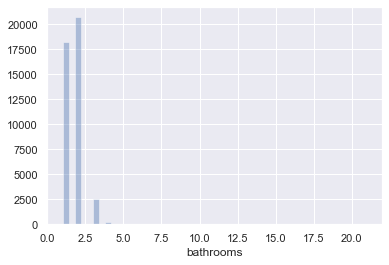

In [36]:
sns.distplot(df['bathrooms'], kde=False)
plt.show()

# Skewed distribution

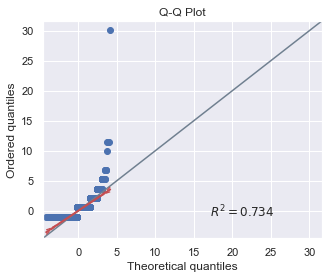

In [37]:
pg.qqplot(df.bathrooms, dist='norm')
plt.show()

# It can be seen from Q-Q Plot diagram below that 'bathrooms' column is not normally distributed.  

In [38]:
df['bathrooms'].value_counts()

2.0     20729
1.0     18201
3.0      2563
4.0       235
5.0        38
6.0         6
9.0         3
21.0        1
8.0         1
Name: bathrooms, dtype: int64

Replacing missing values in 'bathrooms' column with its median, since it is not possible replacing them with its mean because 'bathrooms' datasets are not normally distributed.

In [39]:
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
df['bathrooms'].isna().sum()

0

Converting 'bathrooms' column data type to integer

In [40]:
df['bathrooms'] = df['bathrooms'].astype(int)
type(df['bathrooms'][0])  # checking

numpy.int32

In [41]:
# Checking 'bathrooms' column after preprocessing technique

min_b2 = df['bathrooms'].min()
max_b2 = df['bathrooms'].max()
mean_b2 = df['bathrooms'].mean()
median_b2 = df['bathrooms'].median()
std_b2 = df['bathrooms'].std()

print("Statistics for 'bathrooms' column after dropping missing values:\n")
print("Minimum 'bathrooms': ", min_b2) 
print("Maximum 'bathrooms': ", max_b2)
print("Mean 'bathrooms': ", mean_b2)
print("Median 'bathrooms': ", median_b2)
print("Standard deviation of 'bathrooms': ", std_b2)

Statistics for 'bathrooms' column after dropping missing values:

Minimum 'bathrooms':  1
Maximum 'bathrooms':  21
Mean 'bathrooms':  1.6468952515612112
Median 'bathrooms':  2.0
Standard deviation of 'bathrooms':  0.6402597634352706


Standard deviation for 'bathrooms' column after filling missing values with its median is almost the same as before the preprocessing technique. There is only a small decline in standard deviation of the 'bathrooms' column after the preprocessing process (it is barely noticable).

In [42]:
df.isna().sum()

datesold        0
price           0
suburb          0
postcode        0
parking         0
bathrooms       0
bedrooms        0
propertyType    0
dtype: int64

In [43]:
df.head()

,datesold,price,suburb,postcode,parking,bathrooms,bedrooms,propertyType
0,2000-09-06,223000.0,Nicholls,2913,2,2,4,house
1,2001-01-01,350000.0,Ngunnawal,2913,1,2,3,house
2,2003-11-12,550000.0,Weston,2611,2,2,4,house
3,2005-09-21,276000.0,Isabella Plains,2905,1,1,3,house
4,2005-01-11,400000.0,Conder,2906,2,2,5,house


- __Updating Categorical and Numerical Columns:__

In [44]:
categorical_columns = list(df.describe(exclude='number').columns)
numerical_columns = list(df.describe().columns)

In [45]:
numerical_columns.remove('postcode')

In [46]:
numerical_columns

['price', 'parking', 'bathrooms', 'bedrooms']

In [47]:
categorical_columns.append('postcode')

In [48]:
categorical_columns

['datesold', 'suburb', 'propertyType', 'postcode']

In [49]:
#  Reordering Columns

df_categorical = df[categorical_columns]
df_numerical = df[numerical_columns]
df = pd.concat([df_numerical, df_categorical], axis=1)
df.head(3)

,price,parking,bathrooms,bedrooms,datesold,suburb,propertyType,postcode
0,223000.0,2,2,4,2000-09-06,Nicholls,house,2913
1,350000.0,1,2,3,2001-01-01,Ngunnawal,house,2913
2,550000.0,2,2,4,2003-11-12,Weston,house,2611


In [50]:
df.describe(include='all')

,price,parking,bathrooms,bedrooms,datesold,suburb,propertyType,postcode
count,4.243500e+04,42435.000000,42435.000000,42435.000000,42435,42435,42435,42435.000000
unique,NaN,NaN,NaN,NaN,3845,107,2,NaN
top,NaN,NaN,NaN,NaN,2017-10-28 00:00:00,Kambah,house,NaN
freq,NaN,NaN,NaN,NaN,56,1387,35627,NaN
first,NaN,NaN,NaN,NaN,2000-09-06 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-12-09 00:00:00,NaN,NaN,NaN
mean,6.037398e+05,1.758595,1.646895,3.193307,NaN,NaN,NaN,2728.979592
std,3.139764e+05,0.937494,0.640260,0.989735,NaN,NaN,NaN,146.572504
min,5.000000e+04,0.000000,1.000000,0.000000,NaN,NaN,NaN,2092.000000
25%,4.300000e+05,1.000000,1.000000,3.000000,NaN,NaN,NaN,2607.000000


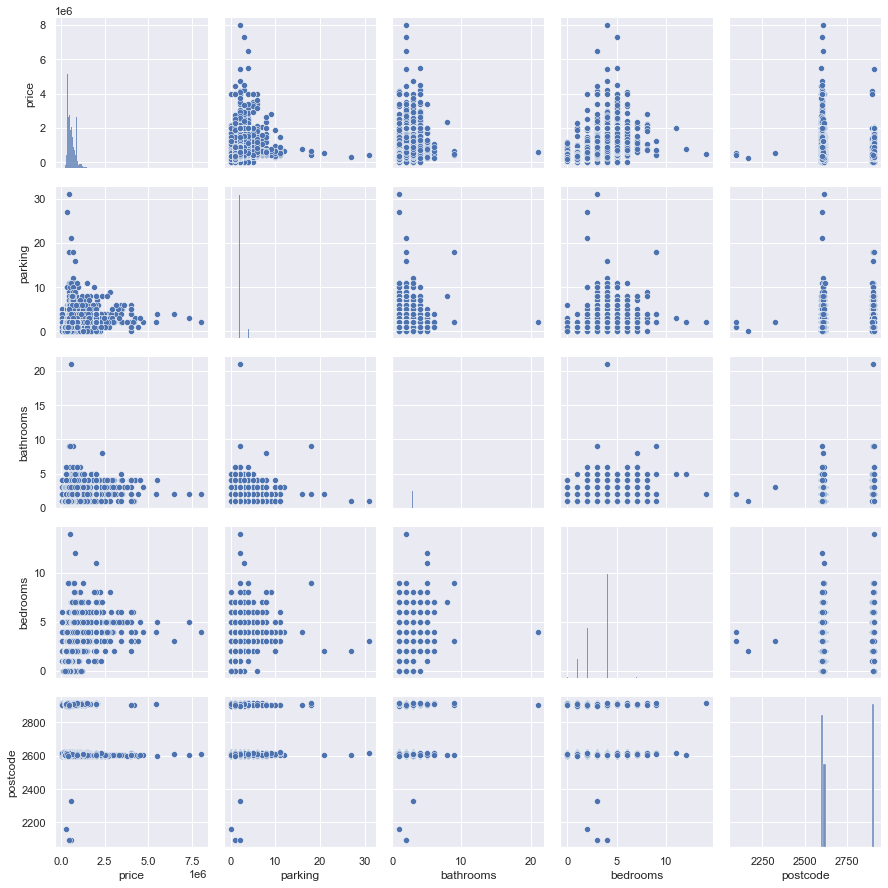

In [51]:
sns.pairplot(df, size=2.5, palette='mako') 
plt.tight_layout()

> #### Dealing with Outliers

In [52]:
def stats_(feature):
    min_ = df[feature].min()
    max_ = df[feature].max()
    mean_ = df[feature].mean()
    median_ = df[feature].median()
    std_ = df[feature].std()

    print(f"Statistics for '{feature}' column:\n")
    print(f"Minimum '{feature}': ", min_)
    print(f"Maximum '{feature}': ", max_)
    print(f"Mean '{feature}': ", mean_)
    print(f"Median '{feature}': ", median_)
    print(f"Standard deviation of '{feature}': ", std_)
    
def detect_outlier_iqr(data):
    outliers=[]
    data_sorted = sorted(data)
    q1, q3= np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    
    for y in data_sorted:
        if y < lower_bound or y > upper_bound:
            outliers.append(y)
    return outliers

In [53]:
# Checking the amount of outliers in the dataset based on 'lower whisker and upper whisker'

for i in df_numerical.columns:
    print(f"Number of outliers in '{i}' column: ", len(detect_outlier_iqr(df[i])))

Number of outliers in 'price' column:  2573
Number of outliers in 'parking' column:  1959
Number of outliers in 'bathrooms' column:  284
Number of outliers in 'bedrooms' column:  2771


Dropping outliers based on 'lower whisker and upper whisker' is not the best decission, since the datasets are already heavily skewed and dropping it might reduce a lot of valuable information. It is a must to examine the dataset from feature to feature.

In [54]:
numerical_columns

['price', 'parking', 'bathrooms', 'bedrooms']

- __Checking Outliers in 'price' Columns:__

In [55]:
stats_('price')

Statistics for 'price' column:

Minimum 'price':  50000.0
Maximum 'price':  8000000.0
Mean 'price':  603739.7770708142
Median 'price':  539000.0
Standard deviation of 'price':  313976.3626098973


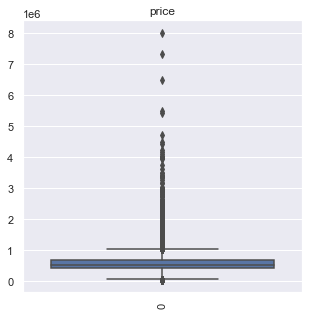

In [56]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['price'])
plt.xticks(rotation=90)
plt.title('price')
plt.show()

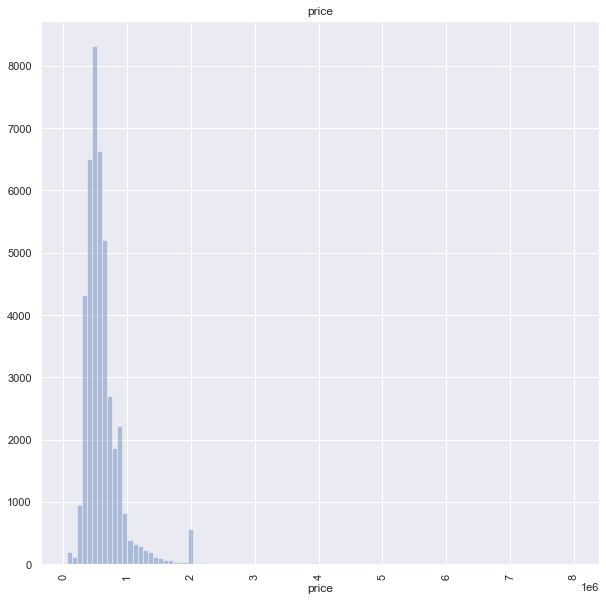

In [57]:
# Data is heavily right-skewed

plt.figure(figsize=(10,10))
sns.distplot(df['price'], kde=False, bins=100)
plt.xticks(rotation=90)
plt.title('price')
plt.show()

In [58]:
# Creating 'PriceRange' column to better see where the distribution of the outliers

df['PriceRange'] = np.where(df['price'] <= 1000000, '0 - 1M',  
                                       np.where ((df['price'] > 1000000) & (df['price'] <= 2000000), '1M - 2M',
                                                np.where((df['price'] > 2000000) & (df['price'] <= 3000000), '2M - 3M',
                                                        np.where((df['price']>3000000) & (df['price']<=4000000), '3M - 4M',
                                                                np.where((df['price']>4000000) & (df['price']<=5000000), '4M - 5M',
                                                                        np.where((df['price']>5000000) & (df['price']<=6000000), '5M - 6M',
                                                                                np.where((df['price']>6000000) & (df['price']<=7000000), '6M - 7M', 
                                                                                         np.where((df['price']>7000000) & (df['price']<=8000000), '7M - 8M', 
                                                                                                 np.where((df['price']>8000000) & (df['price']<=9000000), '8M -9 M', ''
                                                                                                                 )))))))))

In [59]:
df.groupby(['PriceRange']).agg({'PriceRange': ['count']})

,PriceRange
,count
PriceRange,
0 - 1M,39837
1M - 2M,2449
2M - 3M,114
3M - 4M,24
4M - 5M,6
5M - 6M,2
6M - 7M,1
7M - 8M,2


__It can be seen from the table above:__

- 2 data items in the range 5M - 6M
- 1 data item in the range 6M - 7M
- 2 data items in the range 7M - 8M

For the purpose of this analysis, all datas that are mentioned above are going to be dropped. Hence, the maximum real estate price for this analysis is capped at 5M.

In [60]:
df.drop(df[
    (df['PriceRange']=='5M - 6M') |
    (df['PriceRange']=='6M - 7M') |
    (df['PriceRange']=='7M - 8M') 
].index, inplace=True)

- __Checking Outliers in 'parking' Columns__

In [61]:
df['parking'].value_counts()

2     22898
1     13652
3      2100
0      1823
4      1487
5       194
6       185
7        33
8        27
10       11
11        9
9         4
18        2
27        1
12        1
16        1
21        1
31        1
Name: parking, dtype: int64

__It can be seen from the table above:__

- 2 data items have 18 parking lots
- 1 data item has 27 parking lots
- 1 data item has 12 parking lots
- 1 data item has 16 parking lots
- 1 data item has 21 parking lots
- 1 data item has 31 parking lots

For the purpose of this analysis, all datas that are mentioned above are going to be dropped

In [62]:
list_parking_drop = [18, 27, 12, 16, 21, 31]
list_parking_drop_index = df[df['parking'].isin(list_parking_drop)].index
df.drop(list_parking_drop_index, inplace=True)

In [63]:
df[df['parking'].isin(list_parking_drop)].index  # checking the missing values after dropping them

Int64Index([], dtype='int64')

In [64]:
df['parking'].value_counts()  # checking the missing values after dropping them

2     22898
1     13652
3      2100
0      1823
4      1487
5       194
6       185
7        33
8        27
10       11
11        9
9         4
Name: parking, dtype: int64

- __Checking Outliers in 'bathrooms' Columns:__

In [65]:
df['bathrooms'].value_counts()

2     21380
1     18199
3      2562
4       234
5        38
6         6
9         2
21        1
8         1
Name: bathrooms, dtype: int64

In [66]:
df.drop(df[
    (df['bathrooms']==9) |
    (df['bathrooms']==21) |
    (df['bathrooms']==8) 
].index, inplace=True)

__It can be seen from the table above:__

- 2 data items have 9 bathrooms
- 1 data item has 21 bathrooms
- 1 data item has 8 bathrooms

For the purpose of this analysis, all datas that are mentioned above are going to be dropped

In [67]:
df['bathrooms'].value_counts()  # checking the missing values after dropping them

2    21380
1    18199
3     2562
4      234
5       38
6        6
Name: bathrooms, dtype: int64

- __Checking Outliers in 'bedrooms' Columns:__

In [68]:
df['bedrooms'].value_counts()

3     17999
4     13007
2      6250
5      2395
1      2310
6       352
7        53
0        37
8        10
9         3
14        1
12        1
11        1
Name: bedrooms, dtype: int64

In [69]:
df.drop(df[
    (df['bedrooms']==9) |
    (df['bedrooms']==14) |
    (df['bedrooms']==12) |
    (df['bedrooms']==11) 
].index, inplace=True)

__It can be seen from the table above:__

- 3 data items have 9 bedrooms
- 1 data item has 14 bedrooms
- 1 data item has 12 bedrooms
- 1 data item has 11 bedrooms

For the purpose of this analysis, all datas that are mentioned above are going to be dropped

In [70]:
df['bedrooms'].value_counts()  # checking the missing values after dropping them

3    17999
4    13007
2     6250
5     2395
1     2310
6      352
7       53
0       37
8       10
Name: bedrooms, dtype: int64

In [71]:
sorted(df['suburb'].unique())[:10]


['Acton',
 'Ainslie',
 'Amaroo',
 'Aranda',
 'Banks',
 'Barton',
 'Belconnen',
 'Bonner',
 'Bonython',
 'Braddon']

In [72]:
df['propertyType'].unique()

array(['house', 'unit'], dtype=object)

In [73]:
for i in sorted(df['suburb'].unique()):
    print(f'<option value="{i}">{i}</option>')

<option value="Acton">Acton</option>
<option value="Ainslie">Ainslie</option>
<option value="Amaroo">Amaroo</option>
<option value="Aranda">Aranda</option>
<option value="Banks">Banks</option>
<option value="Barton">Barton</option>
<option value="Belconnen">Belconnen</option>
<option value="Bonner">Bonner</option>
<option value="Bonython">Bonython</option>
<option value="Braddon">Braddon</option>
<option value="Bruce">Bruce</option>
<option value="Calwell">Calwell</option>
<option value="Campbell">Campbell</option>
<option value="Casey">Casey</option>
<option value="Chapman">Chapman</option>
<option value="Charnwood">Charnwood</option>
<option value="Chifley">Chifley</option>
<option value="Chisholm">Chisholm</option>
<option value="City">City</option>
<option value="Conder">Conder</option>
<option value="Cook">Cook</option>
<option value="Coombs">Coombs</option>
<option value="Crace">Crace</option>
<option value="Curtin">Curtin</option>
<option value="Deakin">Deakin</option>
<option v

In [74]:
df.head()

,price,parking,bathrooms,bedrooms,datesold,suburb,propertyType,postcode,PriceRange
0,223000.0,2,2,4,2000-09-06,Nicholls,house,2913,0 - 1M
1,350000.0,1,2,3,2001-01-01,Ngunnawal,house,2913,0 - 1M
2,550000.0,2,2,4,2003-11-12,Weston,house,2611,0 - 1M
3,276000.0,1,1,3,2005-09-21,Isabella Plains,house,2905,0 - 1M
4,400000.0,2,2,5,2005-01-11,Conder,house,2906,0 - 1M


In [75]:
df.isna().sum()

price           0
parking         0
bathrooms       0
bedrooms        0
datesold        0
suburb          0
propertyType    0
postcode        0
PriceRange      0
dtype: int64

In [76]:
df2 = df[['price', 'parking', 'bathrooms', 'bedrooms', 'suburb', 'propertyType']]

In [77]:
df2.head(3)

,price,parking,bathrooms,bedrooms,suburb,propertyType
0,223000.0,2,2,4,Nicholls,house
1,350000.0,1,2,3,Ngunnawal,house
2,550000.0,2,2,4,Weston,house


In [78]:
df2.to_csv('property_sales_canberra_preprocessed2.csv', index=False)

In [79]:
#####

<AxesSubplot:xlabel='parking', ylabel='Density'>

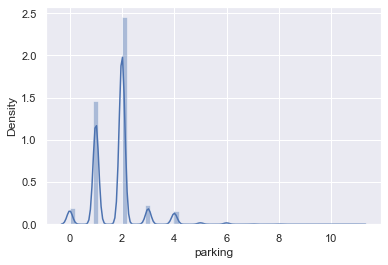

In [80]:
sns.distplot(df2['parking'])

<AxesSubplot:xlabel='parking', ylabel='price'>

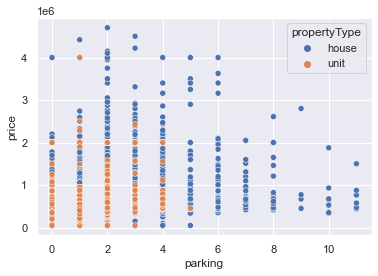

In [81]:
sns.scatterplot(df['parking'], df['price'], hue=df['propertyType'])

In [82]:
#####

In [83]:
# df.to_csv('property_sales_canberra_preprocessed.csv', index=False)

In [84]:
# df.to_csv(index=False)

## Visualization

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42413 entries, 0 to 43177
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         42413 non-null  float64       
 1   parking       42413 non-null  int64         
 2   bathrooms     42413 non-null  int32         
 3   bedrooms      42413 non-null  int64         
 4   datesold      42413 non-null  datetime64[ns]
 5   suburb        42413 non-null  object        
 6   propertyType  42413 non-null  object        
 7   postcode      42413 non-null  int64         
 8   PriceRange    42413 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(3)
memory usage: 3.1+ MB


In [86]:
df.describe(include='all')

,price,parking,bathrooms,bedrooms,datesold,suburb,propertyType,postcode,PriceRange
count,4.241300e+04,42413.000000,42413.000000,42413.000000,42413,42413,42413,42413.000000,42413
unique,NaN,NaN,NaN,NaN,3843,107,2,NaN,5
top,NaN,NaN,NaN,NaN,2017-10-28 00:00:00,Kambah,house,NaN,0 - 1M
freq,NaN,NaN,NaN,NaN,56,1387,35607,NaN,39823
first,NaN,NaN,NaN,NaN,2000-09-06 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-12-09 00:00:00,NaN,NaN,NaN,NaN
mean,6.029612e+05,1.755052,1.645415,3.191781,NaN,NaN,NaN,2728.992479,NaN
std,3.069674e+05,0.902361,0.628896,0.984603,NaN,NaN,NaN,146.574490,NaN
min,5.000000e+04,0.000000,1.000000,0.000000,NaN,NaN,NaN,2092.000000,NaN
25%,4.300000e+05,1.000000,1.000000,3.000000,NaN,NaN,NaN,2607.000000,NaN


In [87]:
df.head(3)

,price,parking,bathrooms,bedrooms,datesold,suburb,propertyType,postcode,PriceRange
0,223000.0,2,2,4,2000-09-06,Nicholls,house,2913,0 - 1M
1,350000.0,1,2,3,2001-01-01,Ngunnawal,house,2913,0 - 1M
2,550000.0,2,2,4,2003-11-12,Weston,house,2611,0 - 1M


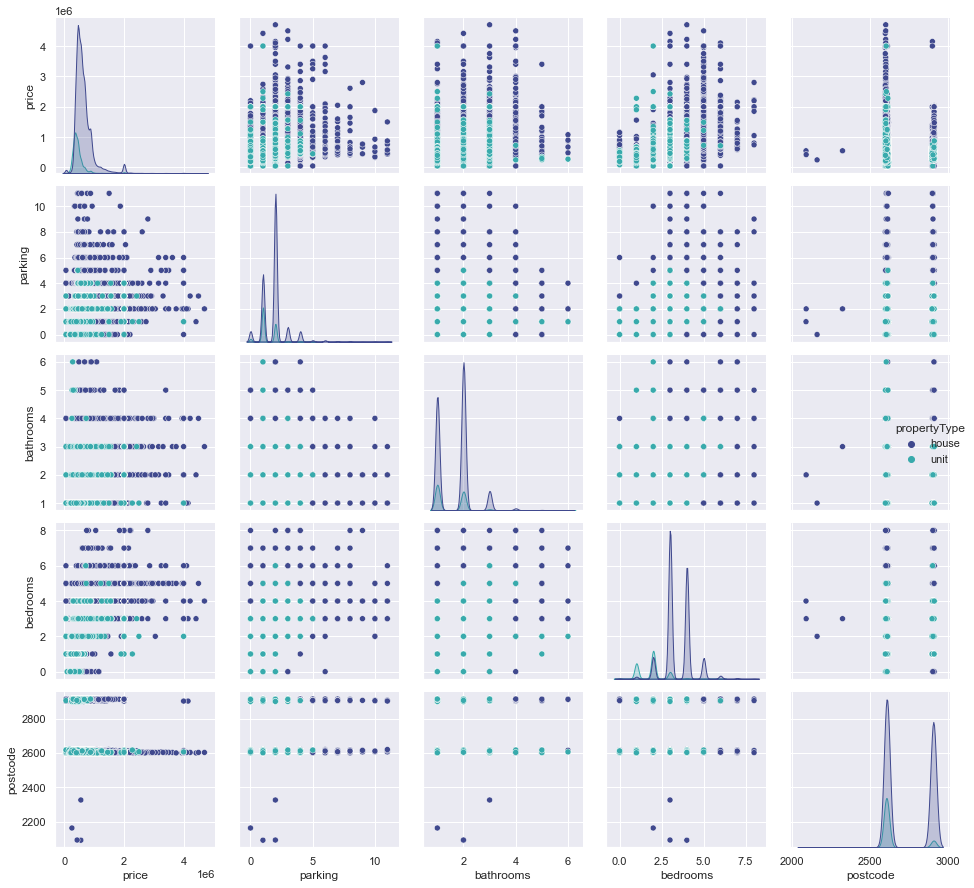

In [88]:
sns.pairplot(df, size=2.5, hue='propertyType', palette='mako')
plt.tight_layout()

It can be seen from the diagram above that generally the price of a house in Canberra is more expensive than its unit.

- __Splitting 'datesold' Column:__

In [89]:
df['yearsold'] = df['datesold'].dt.year

In [90]:
df['monthsold'] = df['datesold'].dt.month

In [91]:
df['daysold'] = df['datesold'].dt.day

- __Dividing 'monthsold' Column Based on 4 Quarters:__

In [92]:
df['quarters'] = np.where((df['monthsold'] >= 1) & (df['monthsold'] <= 3), 'q1',
                        np.where((df['monthsold'] >= 4) & (df['monthsold'] <= 6), 'q2',
                                np.where((df['monthsold'] >= 7) & (df['monthsold'] <= 9), 'q3', 'q4')))
df['quarters'].value_counts()

q4    11037
q3    10773
q2    10309
q1    10294
Name: quarters, dtype: int64

In [111]:
quarters_ = np.where((df['monthsold'] >= 1) & (df['monthsold'] <= 3), 'q1',
                        np.where((df['monthsold'] >= 4) & (df['monthsold'] <= 6), 'q2',
                                np.where((df['monthsold'] >= 7) & (df['monthsold'] <= 9), 'q3', 'q4')))

In [112]:
quarters_

array(['q3', 'q1', 'q4', ..., 'q3', 'q3', 'q3'], dtype='<U2')

- __Dividing 'monthsold' Column Based on 4 Seasons:__

In [93]:
df['seasons'] = np.where((df['monthsold'] >= 3) & (df['monthsold'] <= 5), 'spring',
                        np.where((df['monthsold'] >= 6) & (df['monthsold'] <= 8), 'summer',
                                np.where((df['monthsold'] >= 9) & (df['monthsold'] <= 11), 'fall', 'winter')))
df['seasons'].value_counts()

fall      11348
spring    10861
summer    10423
winter     9781
Name: seasons, dtype: int64

In [94]:
df.head(3)

,price,parking,bathrooms,bedrooms,datesold,suburb,propertyType,postcode,PriceRange,yearsold,monthsold,daysold,quarters,seasons
0,223000.0,2,2,4,2000-09-06,Nicholls,house,2913,0 - 1M,2000,9,6,q3,fall
1,350000.0,1,2,3,2001-01-01,Ngunnawal,house,2913,0 - 1M,2001,1,1,q1,winter
2,550000.0,2,2,4,2003-11-12,Weston,house,2611,0 - 1M,2003,11,12,q4,fall


In [95]:
#####

<AxesSubplot:xlabel='parking', ylabel='price'>

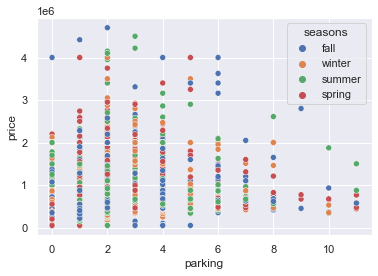

In [96]:
sns.scatterplot(df['parking'], df['price'], hue=df['seasons'])

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

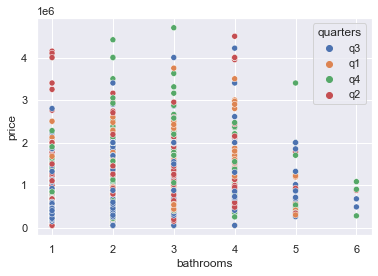

In [97]:
sns.scatterplot(df['bathrooms'], df['price'], hue=df['quarters'])

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

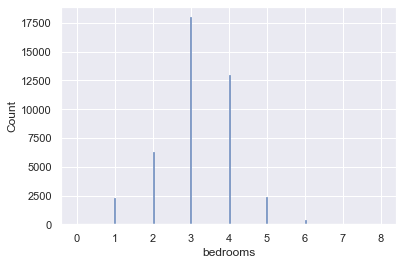

In [98]:
sns.histplot(df['bedrooms'])

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

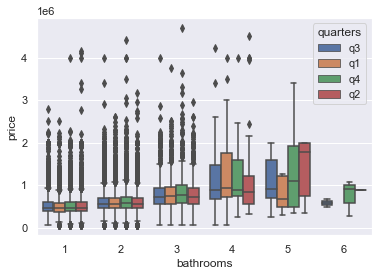

In [99]:
sns.boxplot(df['bathrooms'], df['price'], hue=df['quarters'])

In [100]:
df2.head(2)

,price,parking,bathrooms,bedrooms,suburb,propertyType
0,223000.0,2,2,4,Nicholls,house
1,350000.0,1,2,3,Ngunnawal,house


In [101]:
df.head(2)

,price,parking,bathrooms,bedrooms,datesold,suburb,propertyType,postcode,PriceRange,yearsold,monthsold,daysold,quarters,seasons
0,223000.0,2,2,4,2000-09-06,Nicholls,house,2913,0 - 1M,2000,9,6,q3,fall
1,350000.0,1,2,3,2001-01-01,Ngunnawal,house,2913,0 - 1M,2001,1,1,q1,winter


In [102]:
df3 = df[['price', 'parking', 'bathrooms', 'bedrooms', 'suburb', 'propertyType', 'quarters', 'seasons']]

In [103]:
# df3.to_csv('property_sales_canberra_preprocessed3.csv', index=False)

In [104]:
df3.sample(100, random_state=2021)['propertyType'].unique()

array(['house', 'unit'], dtype=object)

In [105]:
df3_100 = df3.sample(100, random_state=2021)

In [106]:
df3_100.head()

,price,parking,bathrooms,bedrooms,suburb,propertyType,quarters,seasons
1768,515000.0,2,2,3,Garran,house,q2,summer
34630,710000.0,2,2,4,Latham,house,q3,fall
686,367500.0,2,1,4,Ngunnawal,house,q3,fall
15386,565000.0,0,1,3,Downer,house,q2,spring
13175,450000.0,4,1,3,Torrens,house,q1,winter


In [107]:
df3_100.to_csv('property_sales_canberra_preprocessed100.csv', index=False)

In [108]:
# df.to_csv('property_sales_canberra_preprocessed.csv', index=False)

In [109]:
#####

In [110]:
asd = 

SyntaxError: invalid syntax (<ipython-input-110-00382bfa0671>, line 1)

- __Canberra Real Estate Pricing Trend Throughout the Years Based on Its Property Type:__

In [ ]:
df_house_year = df[df['propertyType']=='house'].groupby('yearsold').median()
df_unit_year = df[df['propertyType']=='unit'].groupby('yearsold').median()
list_year = sorted(df['yearsold'].value_counts().index)

plt.figure(figsize=(10,10))

df_house_year['price'].plot(kind='line', color='r',label='House')
df_unit_year['price'].plot(kind='line', color='g',label='Unit')

plt.ylabel('price')
plt.xticks(list_year, rotation=90)
plt.legend()
plt.show()

The line graph indicates that throughout 2000 to 2019, house prices experienced a huge upward trend even though there was a huge dip in 2006. Meanwhile, unit price remained relatively stable from 2007 to 2019 and only experienced slight fluctuations throughout the period. However, through this graph it can also be seen that there are a lot of missing datas before 2007, thus datas with year 2007 are going to be dropped. 

In [ ]:
# Checking the amount of data that needs to be dropped

df[df['yearsold']<2007]['price'].count()

In [ ]:
# Dropping the datas

df.drop(df[df['yearsold']<2007].index, inplace=True)
df['yearsold'].unique()

In [ ]:
# The aftermath after dropping datas before 2007.

df_house_year = df[df['propertyType']=='house'].groupby('yearsold').median()
df_unit_year = df[df['propertyType']=='unit'].groupby('yearsold').median()
list_year = sorted(df['yearsold'].value_counts().index)

plt.figure(figsize=(10,10))

df_house_year['price'].plot(kind='line', color='r',label='House')
df_unit_year['price'].plot(kind='line', color='g',label='Unit')

plt.ylabel('price')
plt.xticks(list_year, rotation=90)
plt.legend()
plt.show()

- __Performance of Real Estate Sales Based on Yearly Quarters and Seasons:__

In [ ]:
# Creating the ratios based on quarterly sales per year
list_year = sorted(df['yearsold'].value_counts().index)
list_ratio_quarters = [df[df['yearsold']==i]['quarters'].value_counts(normalize=True) for i in list_year]

# Creating a ratio dataframe for all sales that happen throughout the period based on their quarters
df_list_ratio_quarters = pd.DataFrame(list_ratio_quarters)
df_list_ratio_quarters.reset_index(inplace=True)
df_list_ratio_quarters.fillna(0, inplace=True)
df_list_ratio_quarters  # checking

# Creating series based on their quarters
list_ratio_q1 = [df_list_ratio_quarters.loc[:,'q1']]
list_ratio_q2 = [df_list_ratio_quarters.loc[:,'q2']]
list_ratio_q3 = [df_list_ratio_quarters.loc[:,'q3']]
list_ratio_q4 = [df_list_ratio_quarters.loc[:,'q4']]

list_vstack = np.vstack([list_ratio_q1, list_ratio_q2, list_ratio_q3, list_ratio_q4])

pal = sns.color_palette("Set1")
plt.figure(figsize=(10,10))
plt.stackplot(list_year, list_vstack, labels=('q1', 'q2', 'q3', 'q4'),colors=pal, alpha=0.4)
plt.xlabel('Years')
plt.ylabel('Ratio')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Throughout 2007 to 2019 there were some fluctuations in the amount of real estate sales per quarter. However, the ratios of sales among all quarters were relatively the same. In addition, only the 4th quarter experienced a decline in real estate sales in 2019.

- __Hypothesis Testing Using Kolmogorov- Smirnov Test:__

In [ ]:
# Creating the ratios based on quarterly sales per year
list_year2 = sorted(df['yearsold'].value_counts().index)
list_nonratio_quarters = [df[df['yearsold']==i]['quarters'].value_counts() for i in list_year2]

# Creating a ratio dataframe for all sales that happen throughout the period based on their quarters
df_list_ratio_quarters2 = pd.DataFrame(list_nonratio_quarters)
df_list_ratio_quarters2.reset_index(inplace=True)
df_list_ratio_quarters2.fillna(0, inplace=True)
df_list_ratio_quarters2  # checking

In [ ]:
# Checking the distribution of quarters in general

list_quarters_dist = 'q1 q2 q3 q4'.split()

for i in list_quarters_dist:
    sns.distplot(df_list_ratio_quarters2[i])
    plt.show()

In [ ]:
# QQ plot q1

pg.qqplot(df_list_ratio_quarters2.sort_values('q1')['q1'], dist='norm')
plt.title('QQ plot q1')
plt.show()

In [ ]:
# QQ plot q2

pg.qqplot(df_list_ratio_quarters2.sort_values('q2')['q2'], dist='norm')
plt.title('QQ plot q2')
plt.show()

In [ ]:
# QQ plot q3

pg.qqplot(df_list_ratio_quarters2.sort_values('q3')['q3'], dist='norm')
plt.title('QQ plot q3')
plt.show()

In [ ]:
# QQ plot q4

pg.qqplot(df_list_ratio_quarters2.sort_values('q4')['q4'], dist='norm')
plt.title('QQ plot q4')
plt.show()

In [ ]:
print(stats.skew(df_list_ratio_quarters2['q1']))
print(stats.skew(df_list_ratio_quarters2['q2']))
print(stats.skew(df_list_ratio_quarters2['q3']))
print(stats.skew(df_list_ratio_quarters2['q4']))

# some datas are close to 0, which means that those datas are close to normal.
# ** this is not an exact number, but the further away from zero (0), the more non- normal the data.

In [ ]:
# Dataset that has over 5000 rows use Kolmogorov-Smirnov test

def k_smirnov_result(arr):
    D, p = stats.kstest(arr, 'norm')
    alpha = 0.05 

    # H0 : Data comes from a normal distribution
    # H1 : Data does not come from a normal distribution

    print(f"Kolmogorov-Smirnov: W={D}, p={p}")
    if p < alpha:
        print('The null hyphotesis can be rejected, thus data does not come from a normal distribution \n')
    else:
        print('The null hyphotesis can not be rejected, thus data comes from a normal distribution \n')

In [ ]:
k_smirnov_result(df_list_ratio_quarters2['q1'])
k_smirnov_result(df_list_ratio_quarters2['q2'])
k_smirnov_result(df_list_ratio_quarters2['q3'])
k_smirnov_result(df_list_ratio_quarters2['q4'])

The distribution for each quarter is __relatively not normal.__

In [ ]:
# Kruskal- Wallis test

kruskal_stats, p = stats.kruskal(df_list_ratio_quarters2['q1'], df_list_ratio_quarters2['q2'], df_list_ratio_quarters2['q3'], df_list_ratio_quarters2['q4'])

def kruskal_w_result(arr1, arr2, arr3, arr4):
    kruskal_stats, p = stats.kruskal(arr1, arr2, arr3, arr4)
    alpha = 0.05 

    # H0 : mu_array1 = mu_array2 = mu_array3 = mu_array4
    # H1 : mu_array1 != mu_array2 != mu_array3 != mu_array4

    print(f"Kolmogorov-Smirnov: W={kruskal_stats}, p={p}")
    if p < alpha:
        print('The null hyphotesis can be rejected, thus: mu_array1 != mu_array2 != mu_array3 != mu_array4 \n')
    else:
        print('The null hyphotesis can not be rejected, thus: mu_array1 = mu_array2 = mu_array3 = mu_array4 \n')

In [ ]:
kruskal_w_result(df_list_ratio_quarters2['q1'], df_list_ratio_quarters2['q2'], df_list_ratio_quarters2['q3'], df_list_ratio_quarters2['q4'])

__Conclusion:__ Through this Kolmogorov- Smirnov test it is proven that sales among all quarters were relatively the same.

In [ ]:
list_rasio_seasons = [df[df['yearsold']==i]['seasons'].value_counts(normalize=True) for i in list_year]
list_rasio_seasons[0]  # checking

In [ ]:
# Creating the ratios of real estate sales based on seasons per year

list_year = sorted(df['yearsold'].value_counts().index)
list_ratio_seasons = [df[df['yearsold']==i]['seasons'].value_counts(normalize=True) for i in list_year]

# Creating a ratio dataframe for all sales that happen throughout the period based on its seasons
df_list_ratio_seasons = pd.DataFrame(list_ratio_seasons)
df_list_ratio_seasons.reset_index(inplace=True)
df_list_ratio_seasons.fillna(0, inplace=True)
df_list_ratio_seasons  # checking

# Creating series based on its quarters
list_ratio_summer = [df_list_ratio_seasons.loc[:,'summer']]
list_ratio_fall = [df_list_ratio_seasons.loc[:,'fall']]
list_ratio_winter = [df_list_ratio_seasons.loc[:,'winter']]
list_ratio_spring = [df_list_ratio_seasons.loc[:,'spring']]

list_vstack = np.vstack([list_ratio_summer, list_ratio_fall, list_ratio_winter, list_ratio_spring])

pal = sns.color_palette("Set1")
plt.figure(figsize=(10,10))
plt.stackplot(list_year, list_vstack, labels=('summer', 'fall', 'winter', 'spring'),colors=pal, alpha=0.4)
plt.xlabel('Years')
plt.ylabel('Ratio')
plt.xticks(rotation=90)
plt.legend()
plt.show()

It can be seen through the stack plot that the amount of real estate sales in the winter season was commonly lower than other seasons.

- __Ranking of Suburbs in Canberra Solely Based on Real Estate Sales Throughout the Period:__

In [ ]:
# Creating a df_suburb table

df_suburb = df.groupby('suburb').count()['price'].sort_values(ascending=False)
df_suburb = df_suburb.reset_index()
df_suburb.rename(columns={'price': 'amount_of_sales'}, inplace=True)

In [ ]:
# Creating a bar plot for all real estate sales throughout the years based on its suburbs

plt.figure(figsize=(20,10))
sns.barplot(df_suburb['suburb'], df_suburb['amount_of_sales'], alpha=0.5)
plt.xticks(rotation=90)
plt.show()

- __Distribution of Suburbs Real Estate Sales Throughout the Period in Canberra Based on Property Type:__

In [ ]:
plt.figure(figsize=(25,15))
sns.countplot(df['suburb'], alpha=0.8, hue=df['propertyType'], palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

This bar graph shows the number of real estate sales from 2007 to 2019 based on suburbs and property type. It can be seen that only few suburbs had unit sales that outweigh their house sales.

- __20 Suburbs with the Highest Amount of Real Estate Sales Grouped By Their Property Type:__

In [ ]:
sales_count_suburb_type = df.groupby(['suburb','propertyType'])[['price']].count()
sales_count_suburb_type.rename(columns={'price': 'amount_of_sales'}, inplace=True)
sales_count_suburb_type.nlargest(20, 'amount_of_sales')

Through this table, it can be seen that house was the dominant type of the property that was sold in the top 20 suburbs with the highest real estate sales grouped by their property type. In addition, Kingston and Braddon were the only suburbs that had unit sales surpass their house sales throughout these years.

In [ ]:
# Creating the crosstab data frame

df_house_unit_outweigh = pd.crosstab(index=df['suburb'], columns=df['propertyType'])
df_house_unit_outweigh.reset_index(inplace=True)

In [ ]:
# Unit sales outweigh house sales

list_unit_outweigh = np.where(df_house_unit_outweigh['house'] < df_house_unit_outweigh['unit'], 1, 0)
df_house_unit_outweigh['unit_outweigh'] = list_unit_outweigh

df_house_unit_outweigh[df_house_unit_outweigh['unit_outweigh']==1].sort_values('unit', ascending=False)[:10]

These were the suburbs that had unit sales outweigh their house sales throughout the period.

In [ ]:
# House sales outweigh unit sales

list_house_outweigh = np.where(df_house_unit_outweigh['house'] > df_house_unit_outweigh['unit'], 1, 0)
df_house_unit_outweigh['house_outweigh'] = list_house_outweigh

df_house_unit_outweigh[df_house_unit_outweigh['house_outweigh']==1].sort_values('house', ascending=False)[:10]

These were the suburbs that had house sales outweigh their unit sales throughout the period.

In [ ]:
# Creating df_suburb_yearsold (mean)

df_suburb_yearsold = df.groupby(['suburb', 'yearsold']).mean()[['price']].reset_index()

In [ ]:
# Creating df_suburb_yearsold2 (count)

df_suburb_yearsold2 = df.groupby(['suburb', 'yearsold']).count()[['price']].reset_index()

In [ ]:
# latest_yearsold, latest_mean_price
df_suburb_head = df_suburb.copy()
suburb_head_syear = [df_suburb_yearsold[df_suburb_yearsold['suburb']==i]['yearsold'].iloc[-1] for i in df_suburb_head['suburb']]
suburb_head_sprice = [df_suburb_yearsold[df_suburb_yearsold['suburb']==i]['price'].iloc[-1] for i in df_suburb_head['suburb']]
df_suburb_head['latest_yearsold'], df_suburb_head['latest_mean_price'] = suburb_head_syear, suburb_head_sprice

# latest_number_sales
suburb_head_snum = [df_suburb_yearsold2[df_suburb_yearsold2['suburb']==i]['price'].iloc[-1] for i in df_suburb_head['suburb']]
df_suburb_head['latest_number_sales'] = suburb_head_snum

# latest_num_house, latest_num_unit
list_series_property_1a = [df[(df['suburb']==i) & (df['yearsold']==j)]['propertyType'].value_counts() for i, j in zip(df_suburb_head['suburb'], df_suburb_head['latest_yearsold'])]
df_suburb_head['latest_num_house'], df_suburb_head['latest_num_unit'] = 0, 0

for i in range(len(list_series_property_1a)):
    if len(list_series_property_1a[i]) == 1:
        if list_series_property_1a[i].index == 'house':
            df_suburb_head['latest_num_house'].iloc[i] = list_series_property_1a[i].values
            df_suburb_head['latest_num_unit'].iloc[i] = 0            
        else:
            df_suburb_head['latest_num_house'].iloc[i] = 0
            df_suburb_head['latest_num_unit'].iloc[i] = list_series_property_1a[i].values
    else:
        df_suburb_head['latest_num_house'].iloc[i] = list_series_property_1a[i][0]
        df_suburb_head['latest_num_unit'].iloc[i] = list_series_property_1a[i][1]

# latest_ratio_house, latest_ratio_unit
list_series_property = [round(df[(df['suburb']==i) & (df['yearsold']==j)]['propertyType'].value_counts(normalize=True), 3) for i, j in zip(df_suburb_head['suburb'], df_suburb_head['latest_yearsold'])]
df_suburb_head['latest_ratio_house'], df_suburb_head['latest_ratio_unit'] = 0, 0

for i in range(len(list_series_property)):
    if len(list_series_property[i]) == 1:
        if list_series_property[i].index == 'house':
            df_suburb_head['latest_ratio_house'].iloc[i] = list_series_property[i].values
            df_suburb_head['latest_ratio_unit'].iloc[i] = 0            
        else:
            df_suburb_head['latest_ratio_house'].iloc[i] = 0
            df_suburb_head['latest_ratio_unit'].iloc[i] = list_series_property[i].values
    else:
        df_suburb_head['latest_ratio_house'].iloc[i] = list_series_property[i][0]
        df_suburb_head['latest_ratio_unit'].iloc[i] = list_series_property[i][1]

- __5 Suburbs with the Highest Amount of Real Estate Sales:__

In [ ]:
df_suburb_head.head()

These were the top 5 suburbs with the highest real estate sales throughout the period; Kambah, Ngunnawal, Gordon, Dunlop, and Kingston. In addition, Kambah, Ngunnawal, and Gordon were the only suburbs which had sales that were above 1000. It can also be seen that most of the sales were contributed by house sales instead of unit sales. 

- __5 Suburbs with the Least Amount of Real Estate Sales:__

In [ ]:
df_suburb_head.tail()

It can be seen from the table above that 'unit' property type had an insignificant role in the most recent real estate sales in these suburbs.

- __Real Estate Pricing Trend Over the Years Based on Suburbs and Property Type:__

In [ ]:
sns.lmplot(x='yearsold', y='price',hue='propertyType', data=df, col='suburb', x_estimator=np.median, col_wrap=3, palette='coolwarm')
plt.ylim(50000, 5000000)
plt.xlim(2007, 2019)
plt.title('Real Estate Pricing Trend Over the Years Based on Suburbs and Property Type')
plt.show()

It can be seen through these linear model regression plots that unit sales trends are often missing or have little to no records in some suburbs. This phenomenon can be caused by unit property type does not exist in some suburbs as well as insignificant role of unit property type in the majority of real estate sales.

In [ ]:
# Creating a function to show top houses/ units from each suburb grouped by the type of the property and number of bedrooms, bathrooms, and parking lots.

def ideal_house_unit(suburb, property_type, num_top):
    ideal_house_df = df.groupby(['suburb','propertyType','bedrooms','bathrooms', 'parking'])[['price']].count()
    ideal_house_df.rename(columns={'price': 'number_of_sales'}, inplace=True)
    df_largest_reset = ideal_house_df.loc[suburb, property_type].nlargest(num_top, 'number_of_sales').reset_index()
    
    list_recent_year_reset = []
    list_recent_price_reset = []
    
    for i in range(num_top):
        list_recent_year_reset.append(df[
        (df['suburb']==suburb) &
        (df['propertyType']==property_type) &
        (df['bedrooms']==df_largest_reset.loc[i, 'bedrooms']) &  # 0 ini buat tes row k 1 d kambah
        (df['bathrooms']==df_largest_reset.loc[i, 'bathrooms']) &
        (df['parking']==df_largest_reset.loc[i, 'parking']) 
    ]['yearsold'].iloc[-1])
    
    df_largest_reset['latest_year'] = list_recent_year_reset
    
    for i in range(num_top):
        list_recent_price_reset.append(round(df[
        (df['suburb']==suburb) &
        (df['propertyType']==property_type) &
        (df['yearsold']==list_recent_year_reset[i]) &
        (df['bedrooms']==df_largest_reset.loc[i, 'bedrooms']) & 
        (df['bathrooms']==df_largest_reset.loc[i, 'bathrooms']) &
        (df['parking']==df_largest_reset.loc[i, 'parking'])
    ]['price'].median(), 2))
    
    df_largest_reset['latest_price_median'] = list_recent_price_reset
    
    return df_largest_reset

In [ ]:
def print_df_ideal_spec(df):
    print("Mean of 'latest_price_median': ", df['latest_price_median'].mean())
    print("Min of 'latest_price_median': ", df['latest_price_median'].min())
    print("Max of 'latest_price_median': ", df['latest_price_median'].max())
    print("Standard Deviation of 'latest_price_median': ", df['latest_price_median'].std())
    print("Sum of 'number_of_sales': ", df['number_of_sales'].sum())

- __Ideal Houses in Top 5 Suburbs with the Highest House Sales Throughout 2007 to 2019:__

In [ ]:
# Ideal Houses in Kambah

display(ideal_house_unit('Kambah', 'house', 10))
print_df_ideal_spec(ideal_house_unit('Kambah', 'house', 10))

In [ ]:
# Ideal Houses in Ngunnawal

display(ideal_house_unit('Ngunnawal', 'house', 10))
print_df_ideal_spec(ideal_house_unit('Ngunnawal', 'house', 10))

In [ ]:
# Ideal Houses in Gordon

display(ideal_house_unit('Gordon', 'house', 10))
print_df_ideal_spec(ideal_house_unit('Gordon', 'house', 10))

In [ ]:
# Ideal Houses in Dunlop

display(ideal_house_unit('Dunlop', 'house', 10))
print_df_ideal_spec(ideal_house_unit('Dunlop', 'house', 10))

In [ ]:
# Ideal Houses in MacGregor

display(ideal_house_unit('MacGregor', 'house', 10))
print_df_ideal_spec(ideal_house_unit('MacGregor', 'house', 10))

- __Ideal Units in Top 5 Suburbs with the Highest Unit Sales Throughout 2007 to 2019:__

In [ ]:
# Ideal Units in Kingston

display(ideal_house_unit('Kingston', 'unit', 10))
print_df_ideal_spec(ideal_house_unit('Kingston', 'unit', 10))

In [ ]:
# Ideal Units in Braddon

display(ideal_house_unit('Braddon', 'unit', 10))
print_df_ideal_spec(ideal_house_unit('Braddon', 'unit', 10))

In [ ]:
# Ideal Units in Belconnen

display(ideal_house_unit('Belconnen', 'unit', 10))
print_df_ideal_spec(ideal_house_unit('Belconnen', 'unit', 10))

In [ ]:
# Ideal Units in Turner

display(ideal_house_unit('Turner', 'unit', 10))
print_df_ideal_spec(ideal_house_unit('Turner', 'unit', 10))

In [ ]:
# Ideal Units in Bruce

display(ideal_house_unit('Bruce', 'unit', 10))
print_df_ideal_spec(ideal_house_unit('Bruce', 'unit', 10))

- __Ranking of Postal Codes in Canberra Solely Based on Real Estate Sales Throughout the Period:__

In [ ]:
# Creating a count plot for all real estate sales throughout the years based on its postal codes

plt.figure(figsize=(20,10))
sns.countplot(df['postcode'], alpha=0.5)
plt.xticks(rotation=90)
plt.show()

- __Distribution of Postal Codes Real Estate Sales Throughout the Period in Canberra Based on Property Type:__

In [ ]:
plt.figure(figsize=(25,15))
sns.countplot(df['postcode'], alpha=0.8, hue=df['propertyType'], palette='Spectral')
plt.xticks(rotation=90)
plt.show()

- __20 Postal Codes with the Highest Amount of Real Estate Sales Grouped By Their Property Type:__

In [ ]:
sales_count_postcode_type = df.groupby(['postcode','propertyType'])[['price']].count()
sales_count_postcode_type.rename(columns={'price': 'amount_of_sales'}, inplace=True)
sales_count_postcode_type.nlargest(20, 'amount_of_sales')

Only 3 postal codes had unit sales outweigh their house sales, these postal codes are 2612, 2604, and 2617.

- __Real Estate Pricing Trend Over the Years Based on Postal Codes and Property Type:__

In [ ]:
sns.lmplot(x='yearsold', y='price',hue='propertyType', data=df, col='postcode', x_estimator=np.median, col_wrap=3, palette='Spectral')
plt.ylim(50000, 5000000)
plt.xlim(2007, 2019)
plt.title('Real Estate Pricing Trend Over the Years Based on Postal Codes and Property Type')
plt.show()

Through these linear regression model plots it can also be seen that the trend of unit sales being insignificant in real estate sales was also happening in these model plots that were based on postal codes.

- __Parking Lots and Price Relationship:__

In [ ]:
sns.lmplot(x="yearsold", y="price", hue="parking", data=df,  x_estimator=np.median, palette='Spectral')
plt.title('Parking Lots vs Price')
plt.show()

This diagram shows that parking lots had little to no effect in the real estate price throughout these years.

- __Bathrooms and Price Relationship:__

In [ ]:
sns.lmplot(x="yearsold", y="price", hue="bathrooms", data=df,  x_estimator=np.median, palette='Spectral')
plt.title('Bathrooms vs Price')
plt.show()

It can be seen through this diagram that there was an upward trend in the real estate price from 2007 to 2019. The magnitude of the price increase throughout this period was depended on the number of bathrooms.

- __Bedrooms and Price Relationship:__

In [ ]:
sns.lmplot(x="yearsold", y="price", hue="bedrooms", data=df,  x_estimator=np.median, palette='Spectral')
plt.title('Bedrooms vs Price')
plt.show()

Through this diagram it can be seen that the price of zero to two bedrooms groups were relatively stable throughout the period. Meanwhile, the rest of the groups experienced an upward trend that were also depended on the number of the bedrooms.

In [ ]:
# Correlation Inspection

target2 = 'price'
k2 = 8 # number of variables for heatmap
cols2 = df.corr().nlargest(k2, target2)[target2].index
cm2 = df[cols2].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm2, annot=True, cmap = 'viridis')
plt.title('Correlation')
plt.show()

It can be seen through this heatmap that bedrooms and bathrooms are the top 2 features with the highest correlation value with price.